# Natural Language Processing - Text Classification $\;\;\;\;\;\;$                       Max Sanii $\;\;\;\;\;\;$                              11/01/2021

## <br>Project Contents:
- 1. Load dataset
- 2. Preprocess dataset
- 3. EDA
- 4. Text Preprocessing, Tokenization, Lemmatization, and Stop Words Removal
- 5. Splitting Data for Train and Test
- 6. Word Embedding Approaches:
        * Count Vectorizer
        * TF-IDF
        * N-gram level TF-IDF 
- 7. Train Model with Logistic Regression
- 8. Train Model with Naive Bayesian
- 9. Ensembling Models

In [ ]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Models
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics

# Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Metrics
from sklearn.metrics import confusion_matrix, auc, roc_curve, accuracy_score, classification_report

# Text processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

#from warnings import simplefilter
#from sklearn.exceptions import ConvergenceWarning
#simplefilter("ignore", category=ConvergenceWarning)

le = LabelEncoder()

## Load the dataset

In [154]:
animal_ds = pd.read_csv("C:/Python/Scripts/Test_Datasets/animal.csv")
computer_ds = pd.read_csv("C:/Python/Scripts/Test_Datasets/computer.csv")

## Preprocess the dataset

In [155]:
print(animal_ds.shape)
print(computer_ds.shape)

(22304, 1)
(25887, 1)


In [156]:
# Label the corresponding dataset to either animal or computer
animal_ds['label'] = 'animal'
computer_ds['label'] = 'computer'

In [157]:
# concatenate both animal and computer records into one dataset
df = pd.concat([animal_ds, computer_ds]).reset_index(drop=True)
df

,text,label
0,they can breed any time of the year their gest...,animal
1,mouse the keystone cops of rodents,animal
2,some species of the jerboa family have long ea...,animal
3,they use quadrupedal locomotion but their larg...,animal
4,armenian birch mouse,animal
...,...,...
48186,with my new fancy wireless mouse that won and ...,computer
48187,wireless keyboard amp mouse for lg la led smar...,computer
48188,don play so don care about this but realized t...,computer
48189,this looks like wireless apple mouse,computer


## EDA

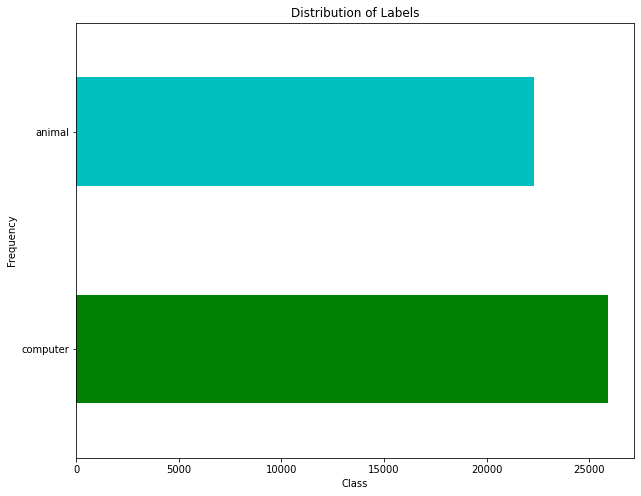

In [158]:
ax = df['label'].value_counts().plot(kind='barh', figsize=(10,8), title="Distribution of Labels",color = list('gc'))
ax.set_xlabel("Class")
ax.set_ylabel("Frequency")
plt.show()

## Text Preprocessing, Tokenization, Lemmatization, and Stop Words Removal

In [159]:
# Drop the empty texts
df = df.dropna(subset=['text'])
len(df)

48191

In [160]:
# Encode the labels into binary values (Animal will be 0, and Computer 1)

lb_make = LabelEncoder()
df["label"] = lb_make.fit_transform(df["label"])
print(df[["text", "label"]])

                                                    text  label
0      they can breed any time of the year their gest...      0
1                     mouse the keystone cops of rodents      0
2      some species of the jerboa family have long ea...      0
3      they use quadrupedal locomotion but their larg...      0
4                                   armenian birch mouse      0
...                                                  ...    ...
48186  with my new fancy wireless mouse that won and ...      1
48187  wireless keyboard amp mouse for lg la led smar...      1
48188  don play so don care about this but realized t...      1
48189               this looks like wireless apple mouse      1
48190  went to use my wireless mouse for the first ti...      1

[48191 rows x 2 columns]


In [163]:
# Convert to lowercase, and strip
def preprocess(text):
    text = text.lower() 
    text=text.strip()
    return text

# Stopword Removal
def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)

# Lemmatization
wl = WordNetLemmatizer()
 
# Helper function to map NTLK position tags to its label
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
# Tokenize the sentence
def lemmatizer(string):
    # mark up the words to position tags based on their definition and context
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) 
    # Map the position tag and lemmatize the word/token
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] 
    return " ".join(a)

# Call all functions
def finalpreprocess(string):
    return lemmatizer(stopword(preprocess(string)))


In [162]:
# Initialize text preprocessing
df['clean_text'] = df['text'].apply(lambda x: finalpreprocess(x))
df.head()

,text,label,clean_text
0,they can breed any time of the year their gest...,0,breed time year gestation period day longer ro...
1,mouse the keystone cops of rodents,0,mouse keystone cop rodent
2,some species of the jerboa family have long ea...,0,specie jerboa family long ears like rabbit whi...
3,they use quadrupedal locomotion but their larg...,0,use quadrupedal locomotion large aerial phase ...
4,armenian birch mouse,0,armenian birch mouse


## Splitting Data into Train and Test

In [164]:
X = df['text'].values
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [165]:
print(X_train.shape)
print(X_test.shape)

(38552,)
(9639,)


## Vectorization approaches (Word Embedding)
Use three vectorization techniques to convert the texts into vectors

In [166]:
# Count Vectorizer
count_vectorizer = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
X_train_countVec =  count_vectorizer.fit_transform(X_train)
X_test_countVec =  count_vectorizer.transform(X_test)

#Tf-Idf
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) 
X_test_vectors_tfidf = tfidf_vectorizer.transform(X_test)

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3))
X_train_tfidf_ngram =  tfidf_vect_ngram.fit_transform(X_train)
X_test_tfidf_ngram =  tfidf_vect_ngram.transform(X_test)

## Create a generic function to train a model with the given inputs

In [167]:
def train_model(classifier, X_vector_train, y_train, X_vector_test):
    # train the model on training dataset
    model = classifier()
    model.fit(X_vector_train, y_train)
 
    # Predict the labels on test dataset
    predictions = model.predict(X_vector_test)
    
    # Get the probability of predictions
    predictions_prob = model.predict_proba(X_vector_test)[:,1]
    
    # Report
    print(classification_report(y_test,predictions))
    print('Confusion Matrix:',confusion_matrix(y_test, predictions))
    fpr, tpr, thresholds = roc_curve(y_test, predictions_prob)
    print('')
    
    # Calculating Accuracy
    print('Accuracy Score :', round(accuracy_score(predictions, y_test) *100, 4))
    
    # Calculating AUC 
    roc_auc = auc(fpr, tpr)
    print('AUC:', round(roc_auc, 4))
    
    return predictions
    

## Logistic Regression
Train the model with Logistic Regression

In [168]:
# Count Vectorizer
y_predict_cv = train_model(linear_model.LogisticRegression, X_train_countVec, y_train, X_test_countVec)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      4466
           1       0.97      0.97      0.97      5173

    accuracy                           0.97      9639
   macro avg       0.97      0.97      0.97      9639
weighted avg       0.97      0.97      0.97      9639

Confusion Matrix: [[4309  157]
 [ 174 4999]]

Accuracy Score : 96.566
AUC: 0.994


In [169]:
# TF-IDF Vectors
y_predict_TFIDF = train_model(linear_model.LogisticRegression, X_train_vectors_tfidf, y_train, X_test_vectors_tfidf)

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      4466
           1       0.97      0.96      0.97      5173

    accuracy                           0.96      9639
   macro avg       0.96      0.96      0.96      9639
weighted avg       0.96      0.96      0.96      9639

Confusion Matrix: [[4310  156]
 [ 186 4987]]

Accuracy Score : 96.4519
AUC: 0.9941


In [170]:
# ngram level TF-IDF Vectors
y_predict_ngram = train_model(linear_model.LogisticRegression, X_train_tfidf_ngram, y_train, X_test_tfidf_ngram)

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      4466
           1       0.92      0.93      0.93      5173

    accuracy                           0.92      9639
   macro avg       0.92      0.92      0.92      9639
weighted avg       0.92      0.92      0.92      9639

Confusion Matrix: [[4035  431]
 [ 346 4827]]

Accuracy Score : 91.939
AUC: 0.9739


## Naive Bayesian

In [171]:
# Count Vectorizer
y_predict_cv = train_model(naive_bayes.MultinomialNB, X_train_countVec, y_train, X_test_countVec)

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      4466
           1       0.97      0.97      0.97      5173

    accuracy                           0.97      9639
   macro avg       0.97      0.97      0.97      9639
weighted avg       0.97      0.97      0.97      9639

Confusion Matrix: [[4331  135]
 [ 181 4992]]

Accuracy Score : 96.7217
AUC: 0.9944


In [172]:
# TF-IDF Vectors
y_predict_TFIDF = train_model(naive_bayes.MultinomialNB, X_train_vectors_tfidf, y_train, X_test_vectors_tfidf)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4466
           1       0.97      0.97      0.97      5173

    accuracy                           0.97      9639
   macro avg       0.97      0.97      0.97      9639
weighted avg       0.97      0.97      0.97      9639

Confusion Matrix: [[4317  149]
 [ 146 5027]]

Accuracy Score : 96.9395
AUC: 0.9955


In [173]:
# ngram level TF-IDF Vectors
y_predict_ngram = train_model(naive_bayes.MultinomialNB, X_train_tfidf_ngram, y_train, X_test_tfidf_ngram)

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      4466
           1       0.94      0.97      0.95      5173

    accuracy                           0.95      9639
   macro avg       0.95      0.95      0.95      9639
weighted avg       0.95      0.95      0.95      9639

Confusion Matrix: [[4139  327]
 [ 163 5010]]

Accuracy Score : 94.9165
AUC: 0.9907


## Display the predicted labels and the texts

In [174]:
dataset = pd.DataFrame({'label': y_predict_TFIDF, 'text': list(X_test)}, columns=['text', 'label'])
final_dataset = dataset.replace(0, 'animal')
final_dataset = final_dataset.replace(1, 'computer')
final_dataset.head(10)

,text,label
0,however it will not function only touchpad mou...,computer
1,was gonna buy the gaming mouse but finally fou...,computer
2,my little foster mouse tedward is so different...,animal
3,thanks for the info scaredymouse am just explo...,animal
4,mouse pad steelseries black,computer
5,what are your thoughts find it is an interesti...,computer
6,razer mouse build qality,computer
7,and now for picture of april with her porridge...,animal
8,don worry too much about escaping mouse aren w...,animal
9,every time witness mouse stretch yawn am gutte...,animal


## Ensembling the Models for improving Predictions

In [175]:
# Picking the three best performing models and vectorizers
model1 = linear_model.LogisticRegression().fit(X_train_vectors_tfidf, y_train)
model2 = naive_bayes.MultinomialNB().fit(X_train_countVec, y_train)
model3 = naive_bayes.MultinomialNB().fit(X_train_vectors_tfidf, y_train)

def predict_text(text):
    text = text.lower()
    # Vectorize the text
    count_feature_vector = count_vectorizer.transform([text])
    tfidf_feature_vector = tfidf_vectorizer.transform([text])
    result_list = []
    
    # Perform prediction on each model
    result1 = model1.predict(tfidf_feature_vector)
    result_list.append(result1[0])
    result2 = model2.predict(count_feature_vector)
    result_list.append(result2[0])
    result3 = model3.predict(tfidf_feature_vector)
    result_list.append(result3[0])
    
    #return result_list
    result = [max(result_list)][0]
    if result == 0:
        return "animal"
    else:
        return "computer"


In [176]:
text = "There is a big mouse in my yard"
print(predict_text(text))

animal


In [177]:
text = text_to_predict = "My mouse is very accurate"
print(predict_text(text))

computer
